In [31]:
import esm4ppe

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from dask.diagnostics import ProgressBar

In [33]:
def draw_globalmap(da,grid,crsP=ccrs.Robinson(central_longitude=-90),cmap='viridis',cname=None):
    if 'basin' in grid.data_vars:
        landmask = grid['wet']
        geolon = 'geolon'
        geolat = 'geolat'
    else:
        landmask = grid['mask']
        geolon = 'GEOLON'
        geolat = 'GEOLAT'
    
    crsT = ccrs.PlateCarree()

    fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crsP})

    X = grid[geolon]
    Y = grid[geolat]
    Z = da.where(landmask)

    im = ax.pcolormesh(X,Y,Z,transform=crsT,shading='auto',cmap=cmap)

    ax.gridlines(color='gray',linestyle='dashed')
    ax.add_feature(cfeature.LAND,color='lightgrey')
    ax.set_title(da.name,fontsize=14)

    # Finally, add a colorbar
    cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.03,pad=0.05)
    if cname is not None:
        cbar.set_label(cname,fontsize=12)
    
    fig.tight_layout()
    
    return fig,ax,im,cbar

In [34]:
es = esm4ppe.esm4ppeObj('intpp','monthly')

Opening static... static opened.


In [35]:
es = es.add_control()

Control present in zarr store... opening... control opened.


In [36]:
clim = es.control.mean('time')

In [37]:
with ProgressBar():
    clim = clim.load()

[########################################] | 100% Completed | 6.83 ss


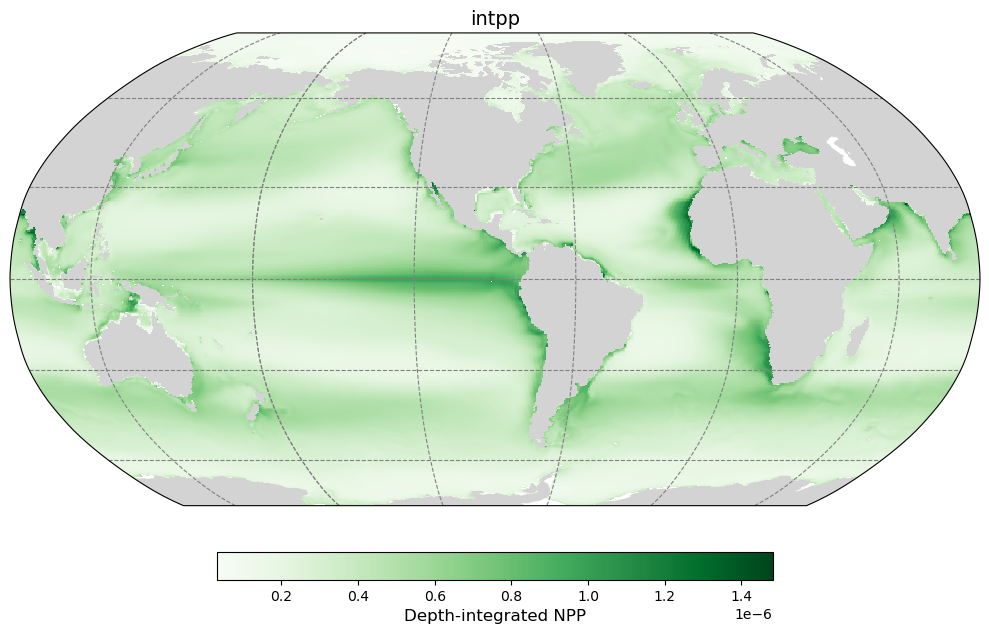

In [38]:
fig,ax,im,cbar = draw_globalmap(clim,es.static,cname='Depth-integrated NPP',cmap='Greens')
# im.set_cmap(im.get_cmap().resampled(10))
# cbar.set_ticks(np.arange(0,121,12))
# cbar.set_ticklabels(np.arange(0,11))
# save_fig(fig,
#          'ppp_timehorizon',
#          variable,
#          '-'.join(filename.split('.')[1:-1]),
#          addnames=['ecosystem'])